In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix


In [115]:
file_path = "/content/drive/My Drive/Colab Notebooks/mjahanzaibanwar/data/"

# data_with_parameters

In [116]:
parameters_data = pd.read_csv(file_path+"data_with_parameters.csv",  index_col=0)

In [117]:
parameters_data.head()

,g_pas,decay_CaDynamics_E2,gamma_CaDynamics_E2,gCa_LVAstbar_Ca_LVAst,gCa_HVAbar_Ca_HVA,gSKv3_1bar_SKv3_1,gSK_E2bar_SK_E2,gK_Tstbar_K_Tst,gK_Pstbar_K_Pst,gNap_Et2bar_Nap_Et2,gNaTa_tbar_NaTa_t
0,0.000035,149.85,0.045669,0.000775,0.000706,0.769,0.06905,0.06975,0.0075,0.005145,1.594
1,0.000033,767.25,0.036363,0.007385,0.000317,0.335,0.00705,0.04305,0.1815,0.006315,0.138
2,0.000046,90.07,0.046659,0.000745,0.000528,1.897,0.02705,0.04685,0.8505,0.008485,2.246
3,0.000047,828.01,0.025671,0.002225,0.000621,0.211,0.05555,0.00855,0.0955,0.007955,1.870
4,0.000038,230.21,0.018444,0.005445,0.000536,0.677,0.00175,0.02405,0.0235,0.009665,2.538


In [118]:
parameters_data.columns[parameters_data.isnull().any()]

Index([], dtype='object')

In [119]:
parameters_data.shape

(1000, 11)

In [120]:
# demonstrate the types of features created
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures

In [121]:
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=2, include_bias=False)
data = trans.fit_transform(parameters_data)
polynomial_df = pd.DataFrame(data)
polynomial_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,0.000035,149.85,0.045669,0.000775,0.000706,0.769,0.06905,0.06975,0.0075,0.005145,1.594,1.240801e-09,0.005278,1.608682e-06,2.729938e-08,2.488646e-08,0.000027,2.432286e-06,2.456944e-06,2.641875e-07,1.812326e-07,0.000056,22455.0225,6.843462,0.116134,0.105869,115.23465,10.347143,10.452038,1.123875,0.770978,238.86090,0.002086,0.000035,0.000032,0.035119,0.003153,0.003185,0.000343,0.000235,0.072796,6.006250e-07,5.475375e-07,0.000596,0.000054,0.000054,0.000006,0.000004,0.001235,4.991422e-07,0.000543,4.878383e-05,0.000049,0.000005,0.000004,0.001126,0.591361,0.053099,0.053638,0.005768,0.003957,1.225786,0.004768,0.004816,0.000518,0.000355,0.110066,0.004865,0.000523,0.000359,0.111182,0.000056,0.000039,0.011955,0.000026,0.008201,2.540836
1,0.000033,767.25,0.036363,0.007385,0.000317,0.335,0.00705,0.04305,0.1815,0.006315,0.138,1.095279e-09,0.025392,1.203425e-06,2.444066e-07,1.050766e-08,0.000011,2.333198e-07,1.424740e-06,6.006743e-06,2.089949e-07,0.000005,588672.5625,27.899320,5.666141,0.243602,257.02875,5.409113,33.030113,139.255875,4.845184,105.88050,0.001322,0.000269,0.000012,0.012182,0.000256,0.001565,0.006600,0.000230,0.005018,5.453822e-05,2.344737e-06,0.002474,0.000052,0.000318,0.001340,0.000047,0.001019,1.008062e-07,0.000106,2.238375e-06,0.000014,0.000058,0.000002,0.000044,0.112225,0.002362,0.014422,0.060803,0.002116,0.046230,0.000050,0.000304,0.001280,0.000045,0.000973,0.001853,0.007814,0.000272,0.005941,0.032942,0.001146,0.025047,0.000040,0.000871,0.019044
2,0.000046,90.07,0.046659,0.000745,0.000528,1.897,0.02705,0.04685,0.8505,0.008485,2.246,2.132131e-09,0.004159,2.154468e-06,3.440038e-08,2.440349e-08,0.000088,1.249034e-06,2.163299e-06,3.927184e-05,3.917949e-07,0.000104,8112.6049,4.202554,0.067102,0.047602,170.86279,2.436394,4.219780,76.604535,0.764244,202.29722,0.002177,0.000035,0.000025,0.088512,0.001262,0.002186,0.039683,0.000396,0.104796,5.550250e-07,3.937325e-07,0.001413,0.000020,0.000035,0.000634,0.000006,0.001673,2.793122e-07,0.001003,1.429593e-05,0.000025,0.000449,0.000004,0.001187,3.598609,0.051314,0.088874,1.613399,0.016096,4.260662,0.000732,0.001267,0.023006,0.000230,0.060754,0.002195,0.039846,0.000398,0.105225,0.723350,0.007216,1.910223,0.000072,0.019057,5.044516
3,0.000047,828.01,0.025671,0.002225,0.000621,0.211,0.05555,0.00855,0.0955,0.007955,1.870,2.238709e-09,0.039177,1.214612e-06,1.052759e-07,2.935896e-08,0.000010,2.628348e-06,4.045432e-07,4.518582e-06,3.763908e-07,0.000088,685600.5601,21.255638,1.842322,0.513780,174.71011,45.995956,7.079486,79.074955,6.586820,1548.37870,0.000659,0.000057,0.000016,0.005417,0.001426,0.000219,0.002452,0.000204,0.048004,4.950625e-06,1.380613e-06,0.000469,0.000124,0.000019,0.000212,0.000018,0.004161,3.850203e-07,0.000131,3.446878e-05,0.000005,0.000059,0.000005,0.001160,0.044521,0.011721,0.001804,0.020151,0.001679,0.394570,0.003086,0.000475,0.005305,0.000442,0.103879,0.000073,0.000817,0.000068,0.015989,0.009120,0.000760,0.178585,0.000063,0.014876,3.496900
4,0.000038,230.21,0.018444,0.005445,0.000536,0.677,0.00175,0.02405,0.0235,0.009665,2.538,1.426951e-09,0.008696,6.967127e-07,2.056849e-07,2.026629e-08,0.000026,6.610625e-08,9.084887e-07,8.877125e-07,3.650954e-07,0.000096,52996.6441,4.245936,1.253493,0.123508,155.85217,0.402868,5.536550,5.409935,2.224980,584.27298,0.000340,0.000100,0.000010,0.012486,0.000032,0.000444,0.000433,0.000178,0.046810,2.964803e-05,2.921243e-06,0.003686,0.000010,0.000131,0.000128,0.000053,0.013819,2.878322e-07,0.000363,9.388750e-07,0.000013,0.000013,0.000005,0.001362,0.458329,0.001185,0.016282,0.015910,0.006543,1.718226,0.000003,0.000042,0.000041,0.000017,0.004442,0.000578,0.000565,0.000232,0.061039,0.000552,0.000227,0.059643,0.000093,0.024530,6.441444


In [122]:
polynomial_df.shape

(1000, 77)

In [123]:
#trans.get_feature_names(df.columns)

In [124]:
#from sklearn import preprocessing as pp


#output_df = PolynomialFeatures_labeled(df,2)
#output_df

In [125]:
#output_df.shape

In [126]:
polynomial_values = polynomial_df.values

# Membrane_Potential_with_Time_Stamp

In [127]:
membrane_potential = pd.read_csv(file_path+"Membrane_Potential_with_Time_Stamp.csv")

In [128]:
membrane_potential.head()

,0.0,0.062,0.125,0.188,0.25,0.312,0.375,0.438,0.5,0.562,0.625,0.688,0.75,0.812,0.875,0.938,1.0,1.062,1.125,1.188,1.25,1.312,1.375,1.438,1.5,1.562,1.625,1.688,1.75,1.812,1.875,1.938,2.0,2.062,2.125,2.188,2.25,2.312,2.375,2.438,...,197.562,197.625,197.688,197.75,197.812,197.875,197.938,198.0,198.062,198.125,198.188,198.25,198.312,198.375,198.438,198.5,198.562,198.625,198.688,198.75,198.812,198.875,198.938,199.0,199.062,199.125,199.188,199.25,199.312,199.375,199.438,199.5,199.562,199.625,199.688,199.75,199.812,199.875,199.938,200.0
0,-77.348943,-77.348925,-77.348907,-77.348889,-77.348871,-77.348853,-77.348836,-77.348818,-77.348801,-77.348784,-77.348766,-77.348749,-77.348732,-77.348715,-77.348698,-77.348681,-77.348664,-77.348648,-77.348631,-77.348614,-77.348598,-77.348581,-77.348565,-77.348549,-77.348533,-77.348516,-77.348500,-77.348484,-77.348468,-77.348453,-77.348437,-77.348421,-77.348406,-77.348390,-77.348375,-77.348359,-77.348344,-77.348329,-77.348313,-77.348298,...,-82.724687,-82.724571,-82.724455,-82.724340,-82.724224,-82.724108,-82.723992,-82.723877,-82.723761,-82.723645,-82.723530,-82.723414,-82.723299,-82.723183,-82.723068,-82.722952,-82.722837,-82.722722,-82.722606,-82.722491,-82.722376,-82.722261,-82.722146,-82.722030,-82.721915,-82.721800,-82.721685,-82.721570,-82.721455,-82.721340,-82.721225,-82.721111,-82.720996,-82.720881,-82.720766,-82.720651,-82.720537,-82.720422,-82.720307,-82.720193
1,-77.576018,-77.575977,-77.575935,-77.575894,-77.575853,-77.575812,-77.575771,-77.575730,-77.575690,-77.575649,-77.575608,-77.575568,-77.575527,-77.575487,-77.575447,-77.575406,-77.575366,-77.575326,-77.575286,-77.575246,-77.575207,-77.575167,-77.575127,-77.575088,-77.575048,-77.575009,-77.574969,-77.574930,-77.574891,-77.574852,-77.574813,-77.574774,-77.574735,-77.574696,-77.574657,-77.574619,-77.574580,-77.574542,-77.574503,-77.574465,...,-84.772569,-84.772552,-84.772534,-84.772517,-84.772499,-84.772482,-84.772464,-84.772447,-84.772429,-84.772412,-84.772394,-84.772376,-84.772359,-84.772341,-84.772324,-84.772306,-84.772289,-84.772271,-84.772253,-84.772236,-84.772218,-84.772201,-84.772183,-84.772165,-84.772148,-84.772130,-84.772113,-84.772095,-84.772077,-84.772060,-84.772042,-84.772024,-84.772007,-84.771989,-84.771972,-84.771954,-84.771936,-84.771919,-84.771901,-84.771883
2,-78.047719,-78.047594,-78.047469,-78.047344,-78.047219,-78.047095,-78.046970,-78.046846,-78.046721,-78.046597,-78.046473,-78.046349,-78.046224,-78.046101,-78.045977,-78.045853,-78.045729,-78.045606,-78.045482,-78.045359,-78.045235,-78.045112,-78.044989,-78.044866,-78.044743,-78.044620,-78.044497,-78.044375,-78.044252,-78.044130,-78.044007,-78.043885,-78.043763,-78.043640,-78.043518,-78.043396,-78.043274,-78.043153,-78.043031,-78.042909,...,-84.802202,-84.802198,-84.802194,-84.802190,-84.802186,-84.802182,-84.802177,-84.802173,-84.802169,-84.802165,-84.802161,-84.802157,-84.802153,-84.802150,-84.802146,-84.802142,-84.802138,-84.802134,-84.802130,-84.802126,-84.802122,-84.802118,-84.802114,-84.802110,-84.802106,-84.802102,-84.802098,-84.802094,-84.802090,-84.802086,-84.802083,-84.802079,-84.802075,-84.802071,-84.802067,-84.802063,-84.802059,-84.802055,-84.802051,-84.802048
3,-77.606813,-77.606788,-77.606763,-77.606739,-77.606714,-77.606690,-77.606665,-77.606641,-77.606617,-77.606592,-77.606568,-77.606544,-77.606520,-77.606496,-77.606472,-77.606449,-77.606425,-77.606401,-77.606378,-77.606354,-77.606331,-77.606307,-77.606284,-77.606261,-77.606238,-77.606215,-77.606192,-77.606169,-77.606146,-77.606123,-77.606100,-77.606077,-77.606055,-77.606032,-77.606010,-77.605987,-77.605965,-77.605942,-77.605920,-77.605898,...,-84.008354,-84.008155,-84.007956,-84.007758,-84.007559,-84.007360,-84.007161,-84.006962,-84.006763,-84.006564,-84.006365,-84.006165,-84.005966,-84.005767,-84.005568,-84.005368,-84.005169,-84.004970,-84.004770,-84.004571,-84.004371,-84.004172,-84.003972,-84.003772,-84.003573,-84.003373,-84.003173,-84.002973,-84.002773,-84.002573,-84.002373,-84.002173,-84.00197

In [129]:
membrane_potential.describe()

,0.0,0.062,0.125,0.188,0.25,0.312,0.375,0.438,0.5,0.562,0.625,0.688,0.75,0.812,0.875,0.938,1.0,1.062,1.125,1.188,1.25,1.312,1.375,1.438,1.5,1.562,1.625,1.688,1.75,1.812,1.875,1.938,2.0,2.062,2.125,2.188,2.25,2.312,2.375,2.438,...,197.562,197.625,197.688,197.75,197.812,197.875,197.938,198.0,198.062,198.125,198.188,198.25,198.312,198.375,198.438,198.5,198.562,198.625,198.688,198.75,198.812,198.875,198.938,199.0,199.062,199.125,199.188,199.25,199.312,199.375,199.438,199.5,199.562,199.625,199.688,199.75,199.812,199.875,199.938,200.0
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-77.689116,-77.689055,-77.688994,-77.688933,-77.688872,-77.688812,-77.688751,-77.688691,-77.688630,-77.688570,-77.688510,-77.688450,-77.688389,-77.688330,-77.688270,-77.688210,-77.688150,-77.688090,-77.688031,-77.687971,-77.687912,-77.687853,-77.687793,-77.687734,-77.687675,-77.687616,-77.687557,-77.687498,-77.687440,-77.687381,-77.687322,-77.687264,-77.687205,-77.687147,-77.687089,-77.687030,-77.686972,-77.686914,-77.686856,-77.686798,...,-82.436851,-82.436559,-82.436267,-82.435976,-82.435684,-82.435393,-82.435102,-82.434810,-82.434519,-82.434228,-82.433938,-82.433647,-82.433356,-82.433066,-82.432775,-82.432485,-82.432195,-82.431905,-82.431615,-82.431325,-82.431035,-82.430746,-82.430456,-82.430167,-82.429877,-82.429588,-82.429299,-82.429010,-82.428721,-82.428433,-82.428144,-82.427856,-82.427567,-82.427279,-82.426991,-82.426703,-82.426415,-82.426127,-82.425839,-82.425551
std,0.710624,0.710557,0.710489,0.710422,0.710354,0.710287,0.710220,0.710152,0.710085,0.710017,0.709950,0.709882,0.709815,0.709748,0.709680,0.709613,0.709545,0.709478,0.709410,0.709343,0.709275,0.709208,0.709140,0.709073,0.709006,0.708938,0.708871,0.708803,0.708736,0.708668,0.708601,0.708533,0.708466,0.708398,0.708331,0.708263,0.708196,0.708128,0.708061,0.707993,...,6.863570,6.863623,6.863676,6.863729,6.863781,6.863834,6.863887,6.863939,6.863992,6.864044,6.864097,6.864149,6.864202,6.864254,6.864306,6.864358,6.864411,6.864463,6.864515,6.864567,6.864619,6.864671,6.864723,6.864775,6.864827,6.864879,6.864930,6.864982,6.865034,6.865086,6.865137,6.865189,6.865240,6.865292,6.865343,6.865395,6.865446,6.865497,6.865549,6.865600
min,-82.021307,-82.020946,-82.020585,-82.020224,-82.019863,-82.019502,-82.019142,-82.018781,-82.018420,-82.018060,-82.017699,-82.017339,-82.016978,-82.016618,-82.016257,-82.015897,-82.015537,-82.015177,-82.014816,-82.014456,-82.014096,-82.013736,-82.013376,-82.013016,-82.012656,-82.012296,-82.011936,-82.011576,-82.011216,-82.010856,-82.010497,-82.010137,-82.009777,-82.009418,-82.009058,-82.008699,-82.008339,-82.007980,-82.007620,-82.007261,...,-84.820987,-84.820983,-84.820978,-84.820974,-84.820970,-84.820966,-84.820962,-84.820958,-84.820954,-84.820950,-84.820946,-84.820941,-84.820937,-84.820933,-84.820929,-84.820925,-84.820921,-84.820917,-84.820913,-84.820909,-84.820905,-84.820901,-84.820897,-84.820893,-84.820889,-84.820884,-84.820880,-84.820876,-84.820872,-84.820868,-84.820864,-84.820860,-84.820856,-84.820852,-84.820848,-84.820844,-84.820840,-84.820836,-84.820832,-

In [130]:
#df2.info()

In [131]:
#df2.shape

In [132]:
#df2.columns
membrane_potential_values = membrane_potential.values

In [133]:
# membrane_potential_values.columns[membrane_potential_values.isnull().any()]

# Preprocessing

In [134]:
#X = output_df.values
#y = df2.values

In [135]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(polynomial_values, membrane_potential_values, test_size=0.3, random_state=7)

In [136]:
import numpy as np
#X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [137]:
#print(X_train.shape)
#print(X_test.shape)
print(X_train)

[[4.4915000e-05 6.5749000e+02 4.8341750e-02 ... 8.3631025e-05
  3.2830550e-02 1.2888100e+01]
 [2.0615000e-05 3.7819000e+02 1.6265750e-02 ... 1.4554225e-05
  9.4688300e-03 6.1603240e+00]
 [3.9755000e-05 4.4973000e+02 2.2403750e-02 ... 9.0535225e-05
  1.9810230e-02 4.3347240e+00]
 ...
 [4.6745000e-05 9.9755000e+02 6.2172500e-03 ... 7.7006250e-06
  3.9904500e-03 2.0678440e+00]
 [3.4625000e-05 7.9567000e+02 3.8342750e-02 ... 6.1230625e-05
  1.4319750e-02 3.3489000e+00]
 [4.5065000e-05 2.1355000e+02 3.4778750e-02 ... 1.2075625e-05
  1.0487550e-02 9.1083240e+00]]


In [138]:
y_test.shape

(300, 3201)

In [139]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

In [140]:
#n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

In [141]:
#print(X_train.shape[1])
#print(n_timesteps)
#print(n_features)
#print(n_outputs)

In [142]:
model = Sequential()
model.add(Conv1D(64, 2,padding='same', activation='relu', input_shape=(X_train.shape[1], 1))) # input_shape=(n_timesteps,n_features)
#model.add(Conv1D(64,3 ,padding='same' activation='relu'))
model.add(Conv1D(64, 3,padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Dense(100, activation='relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1], activation='tanh'))


In [143]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 77, 64)            192       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 77, 64)            12352     
_________________________________________________________________
dropout_2 (Dropout)          (None, 77, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 38, 64)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 38, 100)           6500      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3800)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 3201)             

In [144]:
import tensorflow as tf
from keras.metrics import MeanAbsoluteError
from keras.metrics import MeanSquaredError
from keras.metrics import AUC

In [145]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

In [146]:
!pip install -q git+https://github.com/tensorflow/docs
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [147]:
history1 = model.fit(X_train.reshape(X_train.shape[0],X_train.shape[1],1), y_train,
                  epochs=50,
                  batch_size=128, shuffle=True,
                  verbose=1,
                  validation_split=0.2,
                   callbacks=[tfdocs.modeling.EpochDots()]
                  )

Train on 560 samples, validate on 140 samples
Epoch 1/100
560/560 [==============================] - 2s 4ms/step - loss: 6623.2517 - mae: 80.9264 - mse: 6623.2515 - val_loss: 6481.9049 - val_mae: 79.7966 - val_mse: 6481.9048

Epoch: 0, loss:6623.2517,  mae:80.9264,  mse:6623.2515,  val_loss:6481.9049,  val_mae:79.7966,  val_mse:6481.9048,  
.Epoch 2/100
560/560 [==============================] - 2s 3ms/step - loss: 6546.1839 - mae: 80.4550 - mse: 6546.1841 - val_loss: 6461.9631 - val_mae: 79.6730 - val_mse: 6461.9629
.Epoch 3/100
560/560 [==============================] - 2s 3ms/step - loss: 6532.2465 - mae: 80.3695 - mse: 6532.2471 - val_loss: 6457.0257 - val_mae: 79.6425 - val_mse: 6457.0259
.Epoch 4/100
560/560 [==============================] - 2s 3ms/step - loss: 6528.2231 - mae: 80.3448 - mse: 6528.2231 - val_loss: 6455.2093 - val_mae: 79.6314 - val_mse: 6455.2095
.Epoch 5/100
560/560 [==============================] - 2s 3ms/step - loss: 6526.8119 - mae: 80.3362 - mse: 6526.8115

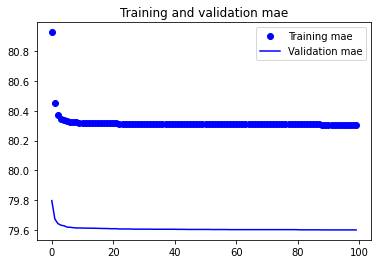

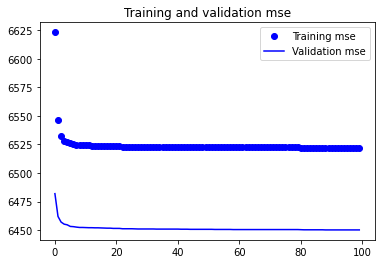

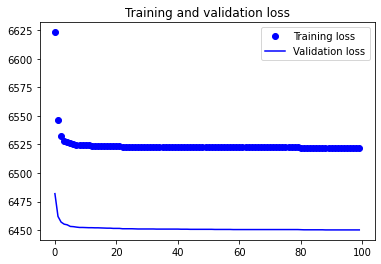

In [148]:
import matplotlib.pyplot as plt

mae = history1.history['mae']
val_mae = history1.history['val_mae']
mse = history1.history['mse']
val_mse = history1.history['val_mse']
loss = history1.history['loss']
val_loss = history1.history['val_loss']


epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.legend()


plt.figure()

plt.plot(epochs, mse, 'bo', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.legend()


plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()